Mike (Mingsi) Gu <br>
CMSC 25300 <br>
PSET 8

In [151]:
import numpy as np
import math
from scipy.io import loadmat
import random
import matplotlib.pyplot as plt

1.

a)
centers = x2, x8

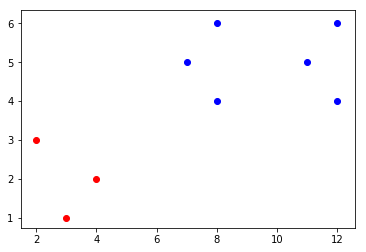

In [215]:
data = [[2,3],[3,1],[4,2],[11,5],[12,4],[12,6],[7,5],[8,4],[8,6]]
centers = [[3,1],[8,4]]
new_centers, points, rss = kmeans(data, centers, True)
plt.figure()
for point in points:
    if point[1] == 0:
        plt.scatter(point[0][0], point[0][1], c='r')
    else:
        plt.scatter(point[0][0], point[0][1], c='b')
plt.show()

b)
centers = x4, x7

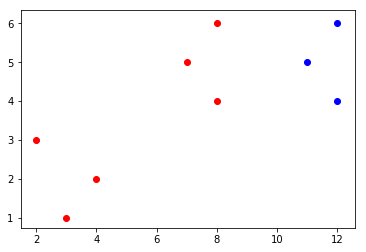

In [211]:
data = [[2,3],[3,1],[4,2],[11,5],[12,4],[12,6],[7,5],[8,4],[8,6]]
centers = [[7,5], [11,5]]
new_centers, points, rss = kmeans(data, centers, True)
plt.figure()
for point in points:
    if point[1] == 0:
        plt.scatter(point[0][0], point[0][1], c='r')
    else:
        plt.scatter(point[0][0], point[0][1], c='b')
plt.show()

2.

In [12]:
digits = loadmat('mnist.mat')
testX = digits["testX"]
testY = digits["testY"]
trainX = digits["trainX"]
trainY = digits["trainY"]

In [13]:
def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

a)

In [214]:
def kmeans(data, centers, init):
    k = len(centers)
    diff = 1e9
    n = 0
    while diff > 0:
        labeled_matrix = []
        for image in data:
            center_index = []
            for center in centers:
                center_index.append(np.linalg.norm(np.array(image) - np.array(center)))
            label = np.argmin(center_index)
            labeled_matrix.append([image, label])
        centers2 = []
        tot_rss = 0
        for i in range(k):
            cluster = np.array([img[0] for img in labeled_matrix if img[1] == i])
            kcenter = np.mean(cluster, axis=0)
            centers2.append(kcenter)
            obj = [point - kcenter for point in cluster]
            rss = np.linalg.norm(obj)**2
            tot_rss += rss
        diff = np.linalg.norm(np.array(centers2) - np.array(centers))
        centers = centers2
        n += 1
        if init == True:
            break
        if n > 150:
            break
    return centers, labeled_matrix, math.sqrt(tot_rss)

b)

In [216]:
n = 20
kmeans_mat = []
for i in range(20):
    subset = np.random.choice(len(trainX), 1000)
    trainX_sub = [trainX[i] for i in subset]
    trainX1 = np.copy(trainX_sub)
    nclusters = partition(trainX1, n)
    centers = []
    for cluster in nclusters:
        centers.append(np.mean(cluster, axis=0))
    kmeans_mat.append(kmeans(trainX_sub, centers, False))

In [160]:
rss = [run[2] for run in kmeans_mat]
min_k = np.argmin(rss)
max_k = np.argmax(rss)

Digits with low objective function value:


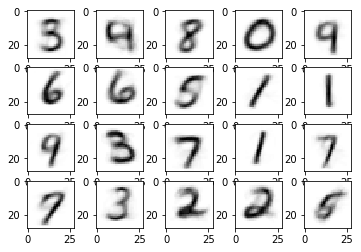

----------------------------------------------
Digits with high objective function value:


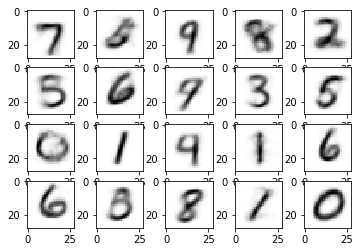

----------------------------------------------


In [181]:
min_images = kmeans_mat[min_k][0]
max_images = kmeans_mat[max_k][0]
for image_set, loc in [(min_images, "low"), (max_images, "high")]: 
    subplot = 0
    plt.figure()
    for image in image_set:
        subplot += 1
        coord = int("45" + str(subplot))
        plt.subplot(4, 5, subplot)
        plt.imshow(np.array(image).reshape((28, 28)), cmap="Greys")
    print("Digits with {} objective function value:".format(loc))
    plt.show()
    print("----------------------------------------------")
